# Edge-Based Segmentation

**Background:**  
Edge-based methods aim to detect object boundaries by identifying intensity discontinuities in images. These methods are commonly used in applications such as road detection and object tracking. The general approach involves detecting edges, refining them, and then extracting meaningful geometric features.

**Tasks:**
- **(a)** Detect edges using the **Canny operator**, and choose suitable low and high hysteresis thresholds.
- **(b)** Perform **non-maxima suppression** and **thresholding** to produce a clean binary edge map.
- **(c)** Apply the **Hough transform** to extract straight lines from the edge map and **overlay** the detected lines on the original image.
- **(d)** **Explain** how **noise** and the **choice of thresholds** affect the completeness of the detected contours.


___

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the image in grayscale
img = cv2.imread("/mnt/e/Term 4/HW/DIP-HW8/data/images/q3/solar.png", cv2.IMREAD_GRAYSCALE)

In [3]:
blurred = cv2.GaussianBlur(img, (7, 7), 1.2)

(-0.5, 699.5, 499.5, -0.5)

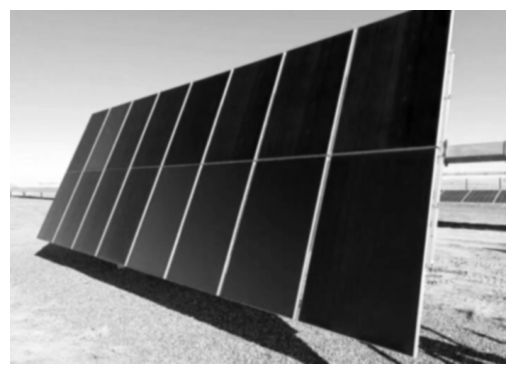

In [4]:
plt.imshow(blurred, cmap='gray')
plt.axis('off')

In [5]:
med = np.median(blurred)
low_thresh_med = 0.33 * med
low_thresh_med

29.040000000000003

In [6]:
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)

gradiend_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
gradiend_magnitude = np.uint8(gradiend_magnitude)

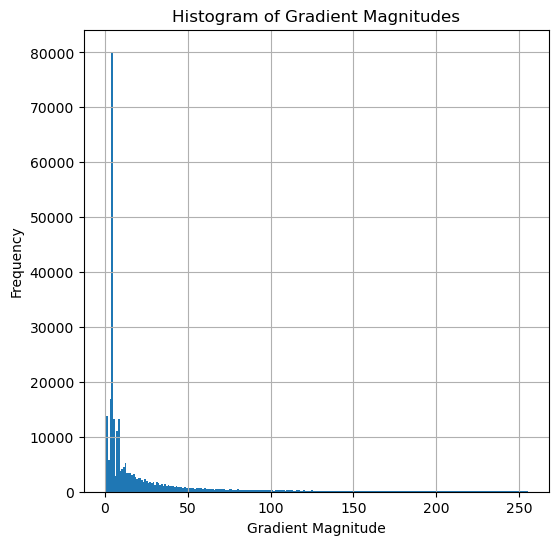

In [7]:
plt.figure(figsize=(6, 6))
plt.hist(gradiend_magnitude.ravel(), bins=256, range=(0, 255))
plt.title("Histogram of Gradient Magnitudes")
plt.xlabel("Gradient Magnitude")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [8]:
low_thresh = 45
high_thresh = 135

In [9]:
edges = cv2.Canny(image=blurred, threshold1=low_thresh, threshold2=high_thresh)

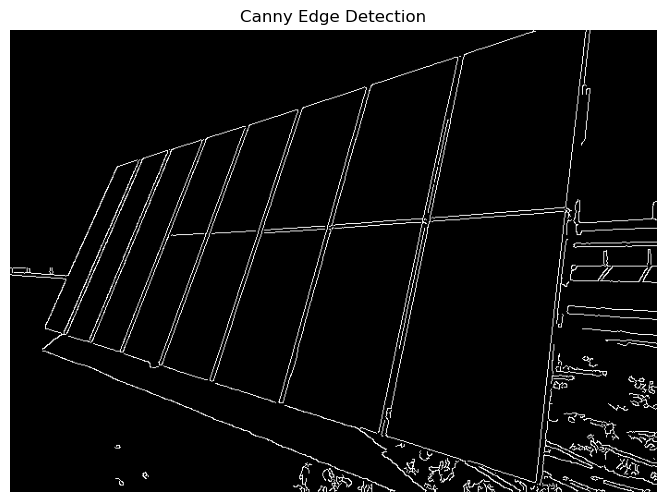

In [10]:
plt.figure(figsize=(10, 6))
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

## Hough Transform Overview

**Hough Transform (HT)** is a mathematical technique used to **detect specific geometric shapes** in an image. 

- **Main idea:** Convert points in the image to a **parameter space** representing a shape.  
- In this space, points that align (e.g., lie on a line) create intersections.  
- These intersections indicate the presence of a **real line or shape** in the image.

### For straight lines:

- Each line can be represented using **(ρ, θ)**:  
$$
\rho = x \cos\theta + y \sin\theta
$$

- Edge pixels in the image map to lines in Hough space.  
- Points with the highest intersections correspond to actual lines.

### Applications:

1. Detect straight lines (roads, building edges, lane markings).  
2. Detect circles or ellipses (coins, wheels, circular objects in medical images).  
3. Work with noisy or incomplete images (lines may be partially missing).  
4. Detect geometric shapes for image analysis (e.g., OCR text lines, robotics paths).

### Types:

- **Standard Hough Transform:** Checks all possible lines, precise but slower.  
- **Probabilistic Hough Transform:** Checks only real segments, faster and more direct.

### Key Notes:

- Usually applied after **Canny edge detection**.  
- Parameters like `threshold`, `minLineLength`, and `maxLineGap` control detection sensitivity and noise removal.  
- Output can be either line coordinates `(x1, y1, x2, y2)` or line parameters `(ρ, θ)`.


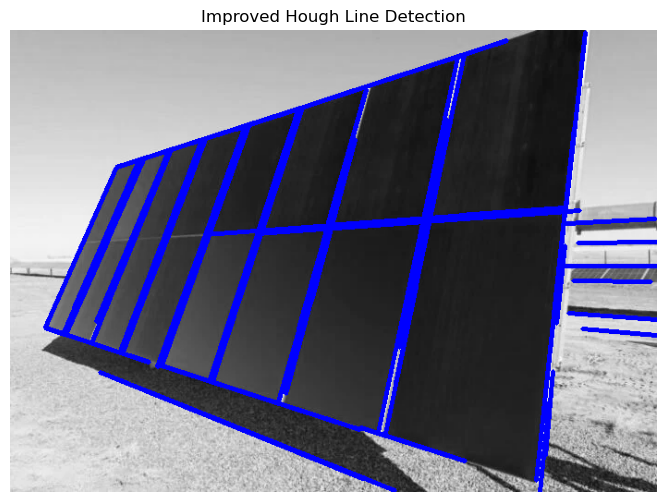

In [14]:
# Probabilistic Hough Transform
lines = cv2.HoughLinesP(
    edges,                # Input: edge-detected binary image
    rho=0.9,              # Distance resolution in pixels
    theta=np.pi / 180,    # Angle resolution in radians (1 degree)
    threshold=40,         # Minimum number of intersections to detect a line
    minLineLength=80,     # Minimum length of a line to be kept
    maxLineGap=10         # Maximum gap between line segments to treat them as a single line
)

# Convert to color to draw lines
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert grayscale image to color (BGR) for colored lines

# Draw lines
if lines is not None:              # Check if any lines were detected
    for line in lines:              # Loop over all detected lines
        x1, y1, x2, y2 = line[0]   # Extract the coordinates of the line endpoints
        cv2.line(output, (x1, y1), (x2, y2), (0, 0, 255), 3)  # Draw a red line with thickness 3

# Show result
plt.figure(figsize=(10, 6))        # Create a figure with specified size
plt.imshow(output)                  # Display the resulting image
plt.title("Improved Hough Line Detection")  # Set the title of the plot
plt.axis('off')                     # Turn off axis
plt.show()                          # Display the final image